The first step will be to import the necessary libraries and read the csv data into a dataframe.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file = 'Data/train.csv'
df = pd.read_csv(file)

file2 = 'Data/unique_m.csv'
df2 = pd.read_csv(file2)

print(df2.keys())
print(df2.head(1))
print(df2.index)

Index(['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al',
       'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn',
       'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb',
       'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In',
       'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm',
       'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta',
       'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At',
       'Rn', 'critical_temp', 'material'],
      dtype='object')
     H  He   Li   Be    B    C    N    O    F  Ne  ...   Au   Hg   Tl   Pb  \
0  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   

    Bi  Po  At  Rn  critical_temp         material  
0  0.0   0   0   0           29.0  Ba0.2La1.8Cu1O4  

[1 rows x 88 columns]
RangeIndex(start=0, stop=21263, step=1)


The second dataframe (df2) contains the chemical composition for each superconductor. The columns represent the element, and the rows indicate how many of that element is in the superconductor. In addition, there are 21,263 superconductors in the dataset

Here are a few questions that this notebook will answer

1. What is the most common element in superconductors?
2. Is there a link between certain elements and high critical temperatures?
3. Are any variables correlated with critical temperature?
4. How are each variable distributed?


To answers the first question, I will generate a bar graph that will display the count for each element found in each superconductors

<BarContainer object of 86 artists>

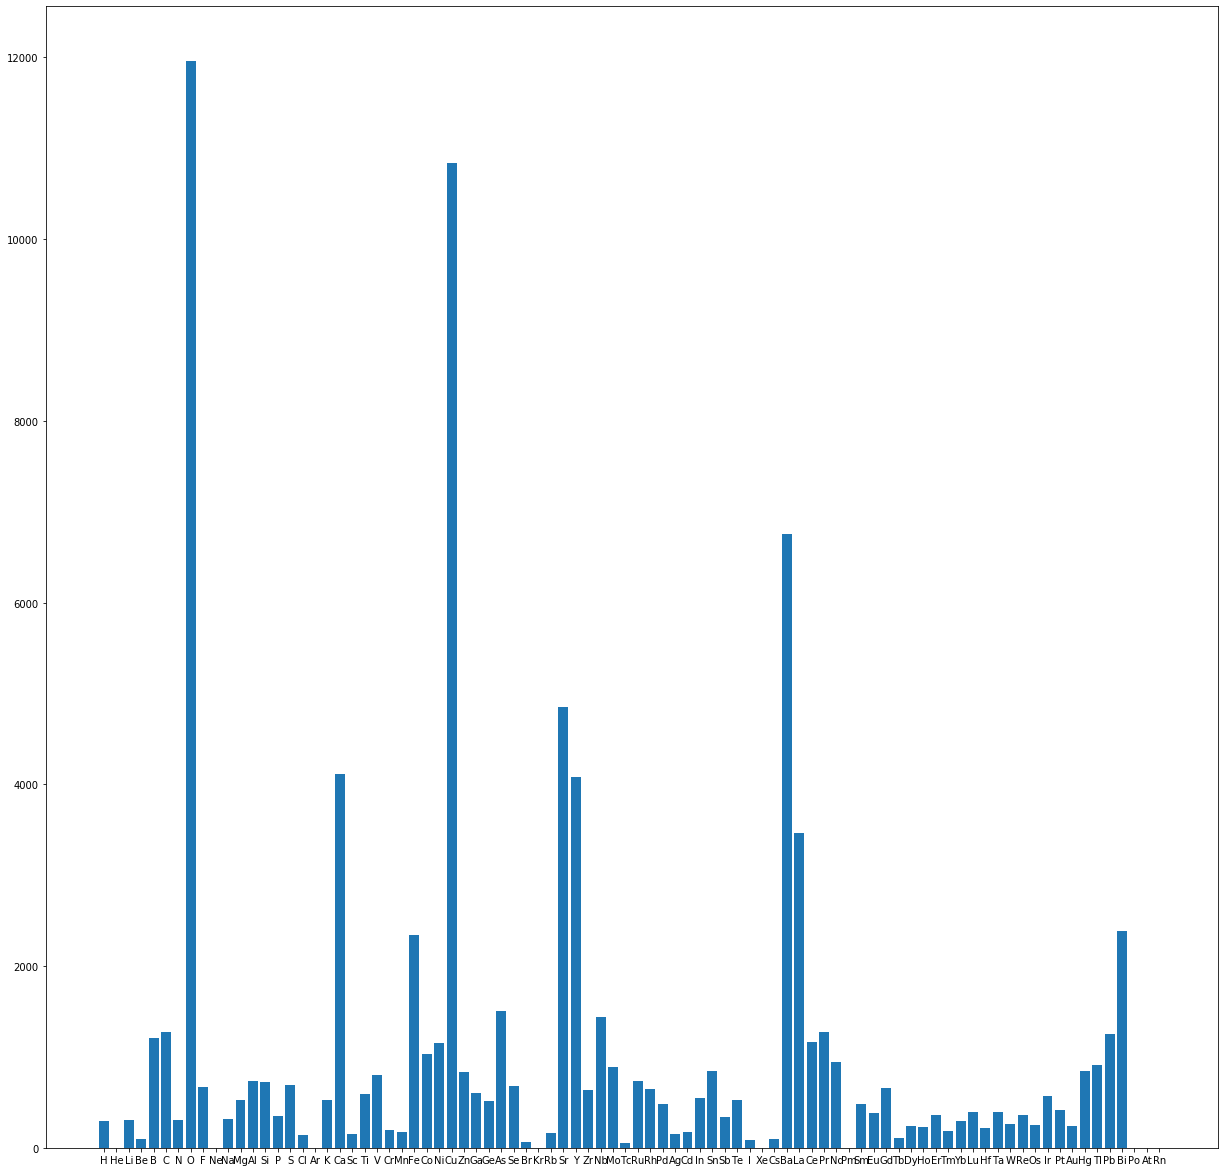

In [13]:
count = []
labels = []


for i in df2.columns:
    if i == 'critical_temp':
        break
    labels.append(i)
    count.append(np.count_nonzero(df2[i]))



plt.figure(1, figsize=(21,21))
plt.bar(labels,count, align = 'center')

    

It is clear from this chart that oxygen is very common, but it is hard to compare the count for other elements. The next step will be to order the chart from highest to lowest count.

Text(0, 0.5, 'Count')

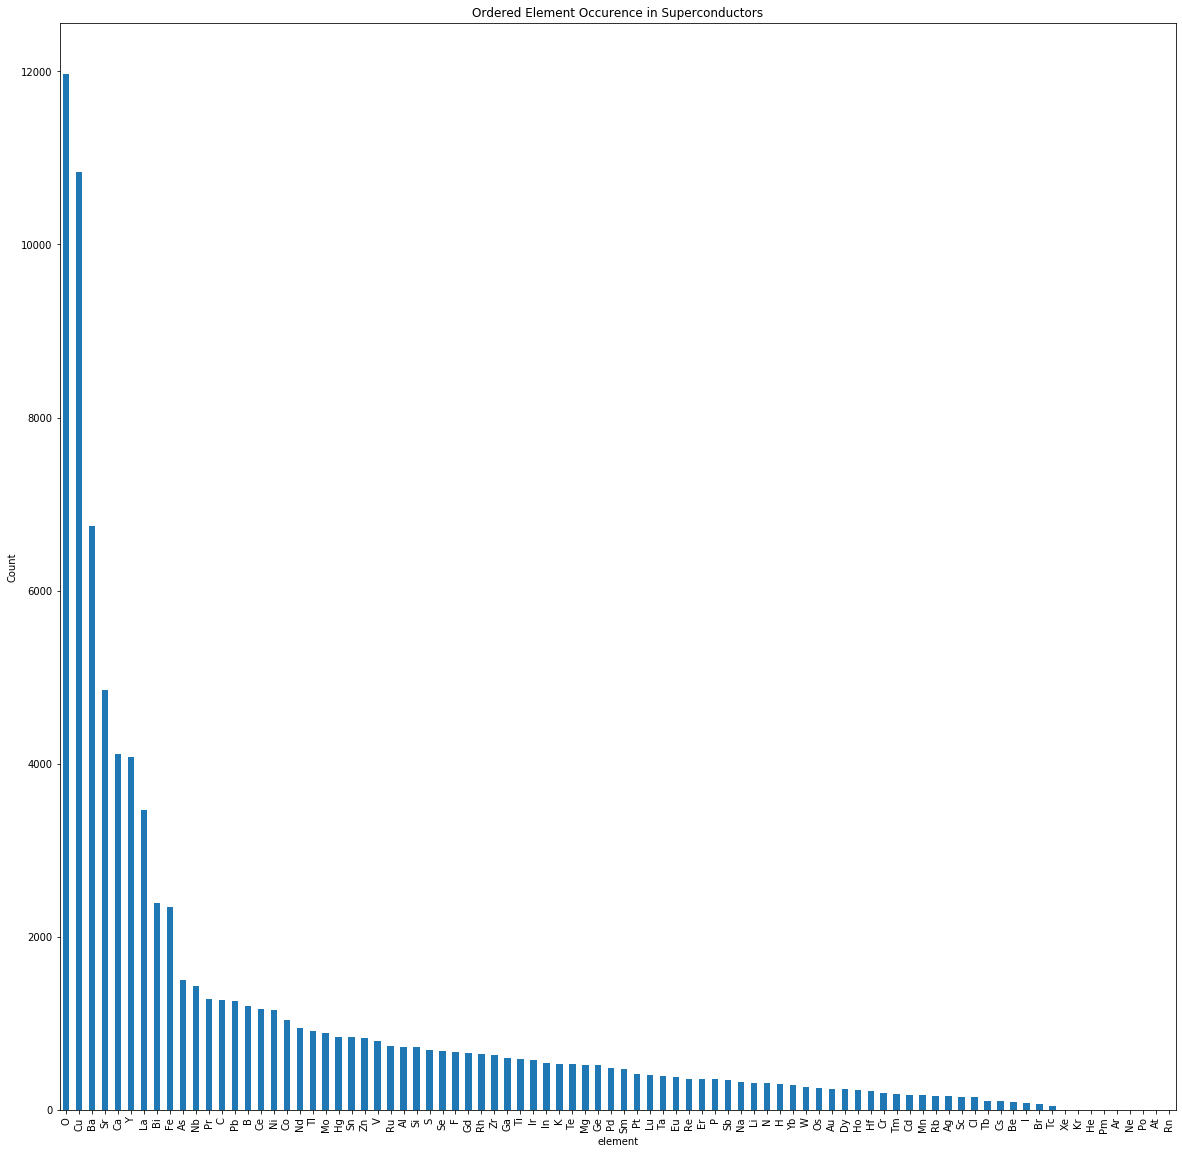

In [39]:
df3 = pd.DataFrame(count)

df3['element'] = labels

df4 = df3.sort_values(by = [0], axis = 0, ascending = False)

df4.plot.bar(x = 'element',legend = False, figsize = (20, 20))

plt.title('Ordered Element Occurence in Superconductors')
plt.ylabel('Count')


Top 10 elements in superconductors

1. Oxygen
2. Copper
3. Barium
4. Strontium
5. Calcium
6. Ytrium
7. Lanthanum
8. Bismuth
9. Iron
10. Arsenic



Oxygen is the most prevelent element in superconductors as approximately 56% of the superconductors has atleast 1 oxygen atom in their composition. However, is that trend the same when examining the composition of superconductors that are above the 80th percentile in terms of critical temperature. In other words, what elements are most common in superconductors that exhibit the highest critical temperature in the dataset

Number of Superconductors above the 80 percentile mark:  4249
Number of superconductors with oxygen:  4246
Number of superconductors with copper:  4237


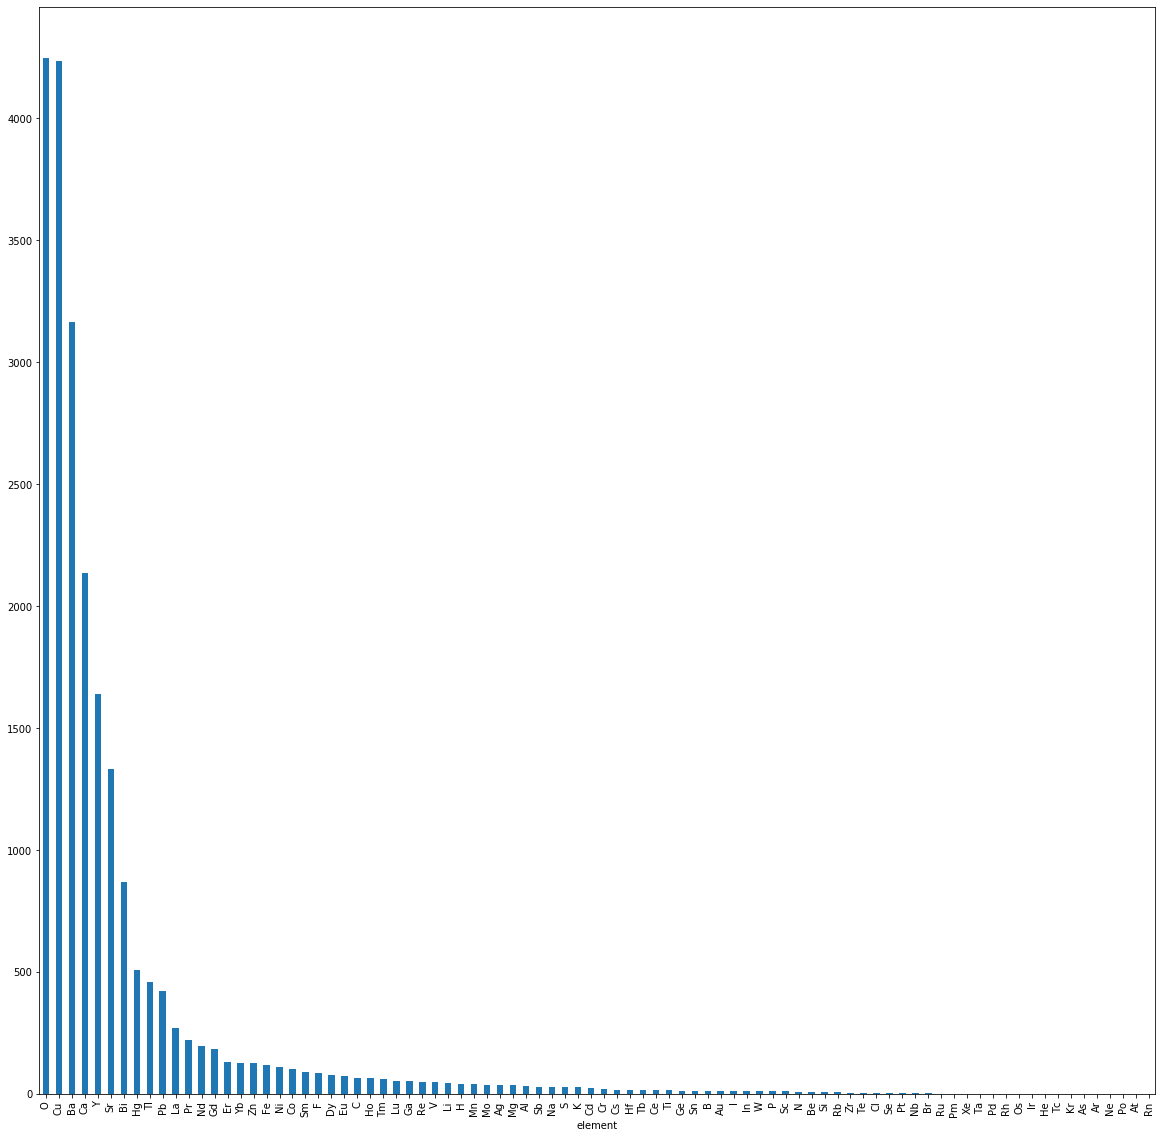

In [36]:
count2 = []
labels2 = []


p80 = np.percentile(df['critical_temp'],80)
ctemp = df['critical_temp']



top20 = ctemp[ctemp>p80]

print('Number of Superconductors above the 80 percentile mark: ',top20.count())

combined = pd.concat([df2, top20],axis = 1,join = 'inner')

#sort = combined.sort_values(by = [0], axis = 0, ascending = False)
#combined = combined.reset_index()


for i in combined.columns:
    if i == 'critical_temp':
        break
    labels2.append(i)
    count2.append(np.count_nonzero(combined[i]))

    
newdf = pd.DataFrame(count2)

newdf['element'] = labels2
sort = newdf.sort_values(by = [0], axis = 0, ascending = False)

print('Number of superconductors with oxygen: ',np.count_nonzero(combined['O']))
print('Number of superconductors with copper: ',np.count_nonzero(combined['Cu']))


sort.plot.bar(x = 'element', legend = False, figsize = (20, 20))


Above the 80 percentile mark, there are 4,249 superconductors. Oxygen is found in 4,246 on them, and copper in 4,237. It is reasonable to assume that the combination of oxygen and copper would be found in a superconductor with a high critical temperature

Top 10 elements in above 80 percentile

1. Oxygen
2. Copper
3. Barium
4. Calcium
5. Ytrium
6. Strontium
7. Bismuth
8. Mercury
9. Titanium
10. Lead

changes are:

Ytrium now in top five. lanthanum, arsenic, iron are no longer in the list. Mercury, Titanium, and Lead are instead present in the list. Finally, oxygen and Copper have not moved positions, but the copper count is increased in percent


Overall, metals are the main elements found in superconductors. Metals in the second group are most common



A final count will be made, this time looking at the bottom 20% of the superconductors. The goal here is to see if oxygen and copper are still as present as they are for the top 20%. The methodology is the same as the previous code, but below 20% is used rather than above 80%

Number of Superconductors below the median:  4252
Number of superconductors with oxygen:  424
Number of superconductors with copper:  281


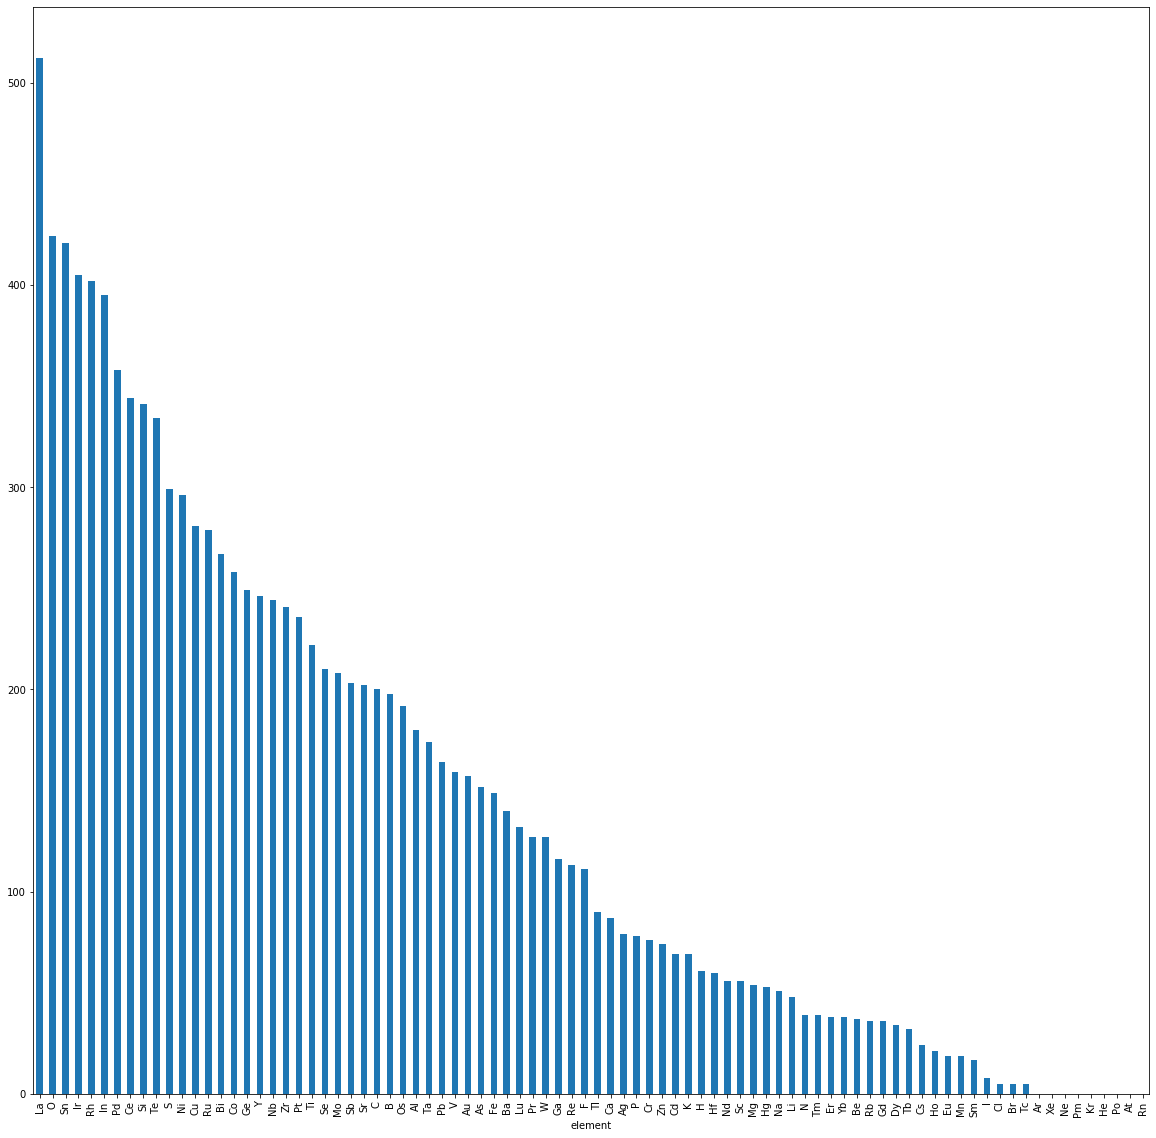

In [46]:
count3 = []
labels3 = []


p50 = np.percentile(df['critical_temp'],20)
ctemp = df['critical_temp']



bot50 = ctemp[ctemp<p50]

print('Number of Superconductors below the median: ',bot50.count())

combined2 = pd.concat([df2, bot50],axis = 1,join = 'inner')

#sort = combined.sort_values(by = [0], axis = 0, ascending = False)
#combined = combined.reset_index()


for i in combined2.columns:
    if i == 'critical_temp':
        break
    labels3.append(i)
    count3.append(np.count_nonzero(combined2[i]))

    
newdf2 = pd.DataFrame(count3)

newdf2['element'] = labels3
sort2 = newdf2.sort_values(by = [0], axis = 0, ascending = False)

print('Number of superconductors with oxygen: ',np.count_nonzero(combined2['O']))
print('Number of superconductors with copper: ',np.count_nonzero(combined2['Cu']))


sort2.plot.bar(x = 'element', legend = False, figsize = (20, 20))

Although oxygen is still one of the top elements present in the superconductors, it is now present in only 10% of the superconductors. Copper is even lower at 7%. In addition, there are more elements that are significantly present when compared to the previous chart. There is thus no clear element element that stands out that would influence the critical temperature

In [47]:
print(df['number_of_elements'].median())

4.0


The median number of elements in a superconductor is 4. From the previous results, we can conclude that the superconductors with the highest critical temperature would be composed of atleast oxygen and copper. 

A heat map will be generated to visualize the covariance matrix . This will be done by first normalizing the data, then creating the covariance matrix using the .cov() method, and finally calling the sns.heatmap() from the seaborn library



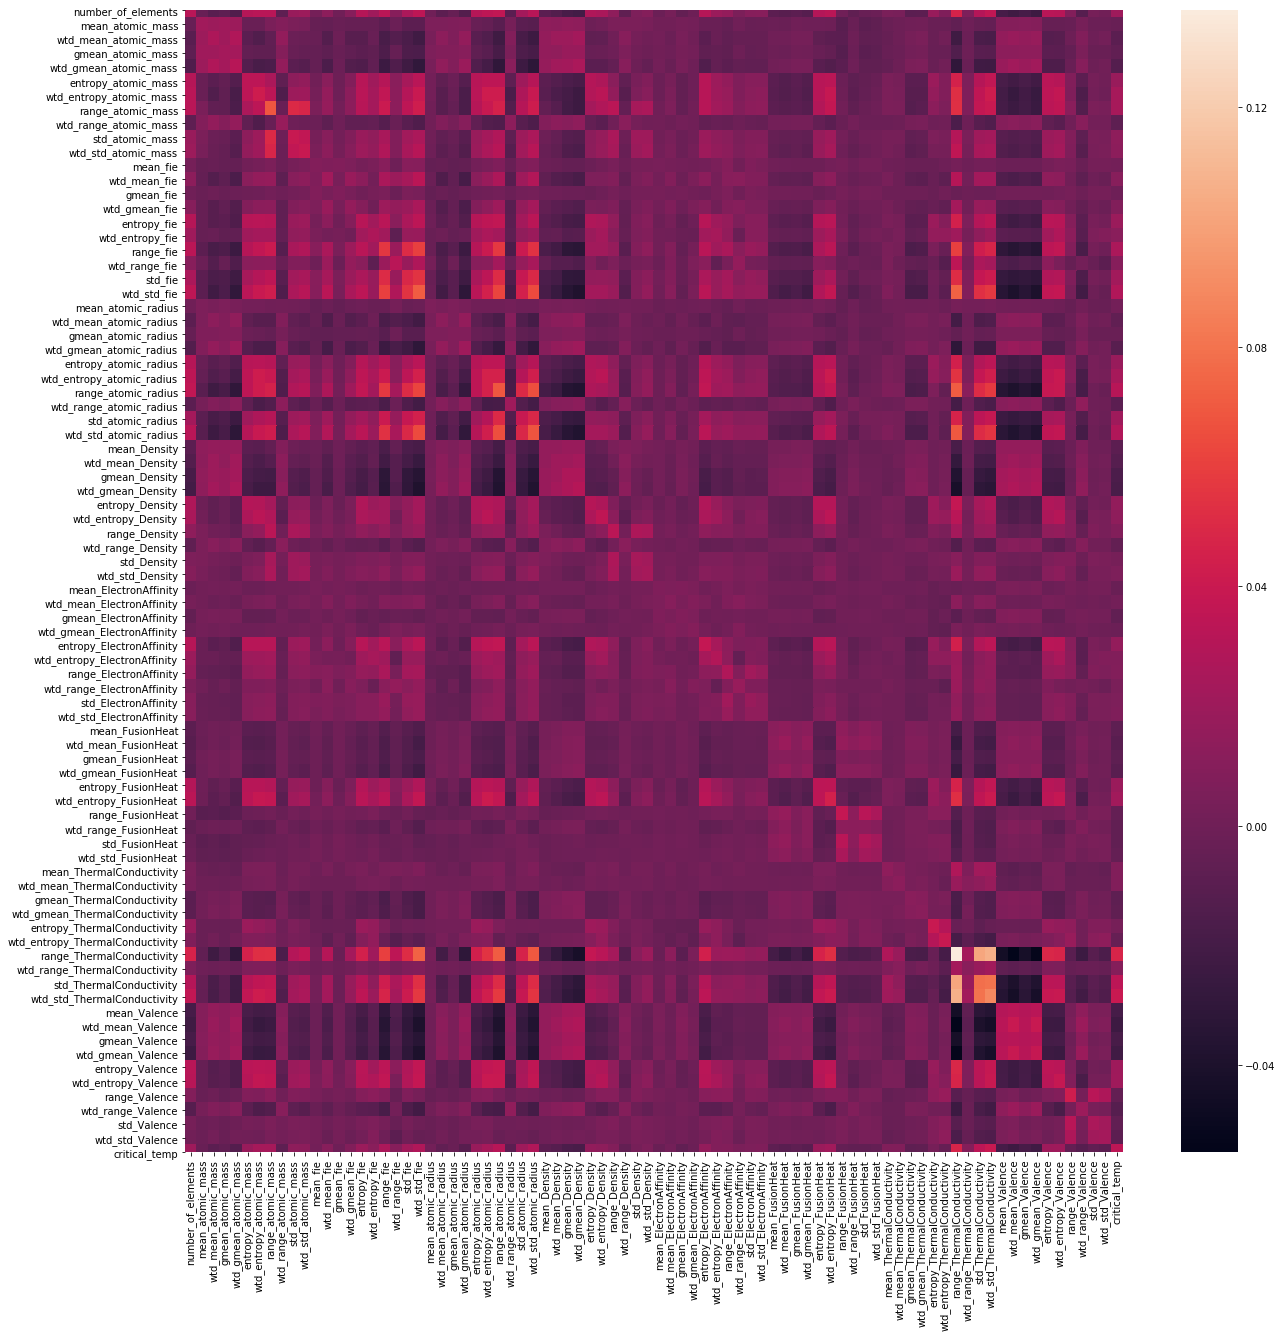

In [40]:
#normalize the dataset
df_norm = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))

cov_matrix = df_norm.cov()


plt.figure(1, figsize=(21,21))
sns.heatmap(cov_matrix)

The last step will be to visualize the distribution of the variables. This will be done by creating a histogram for each column in the first dataframe. In total, 82 plots will be created that represents all 82 columns of data excluding the name of the superconductor.

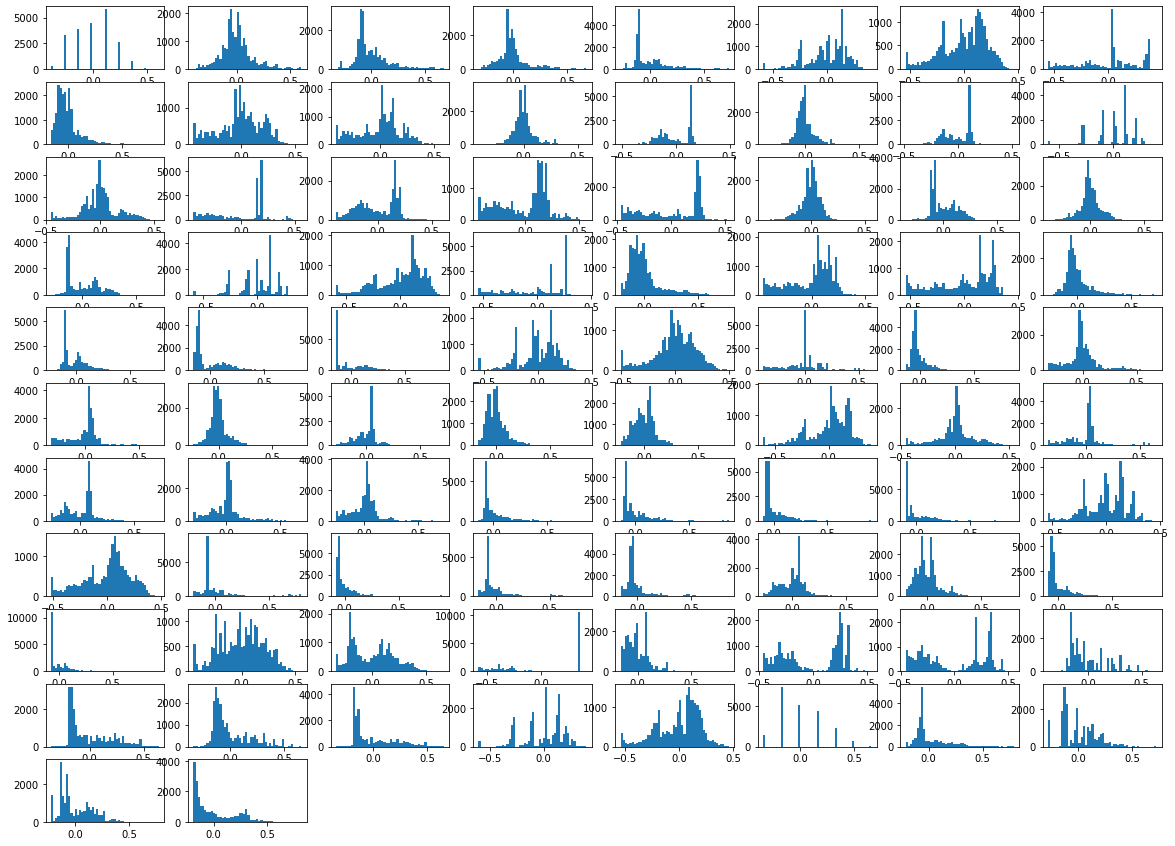

In [19]:
x = 11
y = 8
plt.figure(1, figsize=(20,15))

for i in range(82):
    plt.subplot(x,y,i+1)
    plt.hist(df_norm.iloc[:,i], bins = 50)

To conclude, four questions were asked and answered. For the first question, it was determined that superconductors were primarily composed of oxygen and copper. Upon investigating the top 20% if superconductors in terms of critical temperature, it was determined that nearly 100 percent of them was composed of atleast oxygen and copper. Metals like ytrium became more present, and a trend of second group metal became apparent for high critical temperatures. A heat map for the covariance matrix was created to see if there are strong correlations between variables and histograms were plotted for each column in the original dataframe to visualize their distributions. 

With these insights in the data, the next step will be to apply statistics to determine any significance in the results 